In [ ]:
import xarray as xr
import numpy as np
from xmitgcm import llcreader

In [ ]:
indir = '/nobackup/jwang23/llc4320_stripe/global.dynamic.height.shuiming/'

In [ ]:
import scipy.io
mat = scipy.io.loadmat(indir +'dh_grids_fname.mat')

In [ ]:
dyn = xr.open_dataset('/nobackup/jwang23/llc4320_stripe/global.dynamic.height.shuiming/dh/2011_11_20_15.h5')

NameError: name 'xr' is not defined

In [23]:
lat = mat.get('lat_eta')
lon = mat.get('lon_eta')
lon[lon>180]=lon[lon>180]-360

In [24]:
steric_height = dyn.assign_coords({"phony_dim_0": np.squeeze(lat),"phony_dim_1": np.squeeze(lon) }
                                 ).rename({"phony_dim_0": "lat","phony_dim_1": "lon" })
steric_height = steric_height.roll(lon=1000,roll_coords=True)

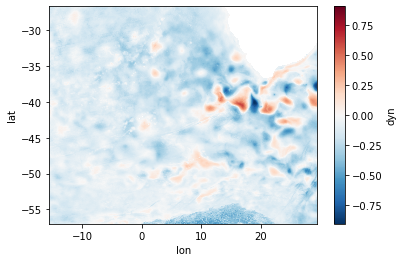

In [25]:
steric_height.dyn.isel(lon=slice(256,2416),lat=slice(1440,3600)).plot()

In [30]:
steric_height

<xarray.Dataset>
Dimensions:  (lat: 8640, lon: 17280)
Coordinates:
  * lat      (lat) float32 -70.0 -69.99 -69.98 -69.97 ... 56.97 56.98 56.99
  * lon      (lon) float32 -20.82 -20.8 -20.78 -20.76 ... -20.89 -20.86 -20.84
Data variables:
    dyn      (lat, lon) float32 -0.6895 -0.6043 -0.516 ... -0.01797 -0.01526

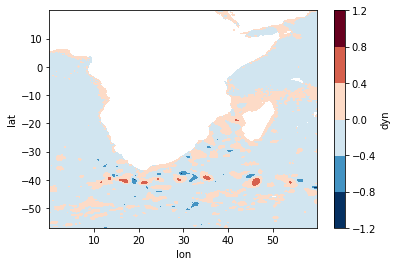

In [20]:
steric_height.sel(lon=slice(-15,60),lat=slice(-57,20)).dyn.plot.contourf()

In [26]:
model = llcreader.PleiadesLLC4320Model()

In [27]:
ds = model.get_dataset(varnames=['Eta'], type='latlon')
